In [9]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
data=pd.read_csv("alll_combined_output.csv")
data.keys()

/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykernel_75372/2773758319.py:1: DtypeWarning: Columns (163) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("alll_combined_output.csv")


Index(['quoteType', 'symbol', 'underlyingSymbol', 'uuid', 'maxAge',
       'trailingPegRatio', 'Year', 'Net Income', 'Revenue', 'EBITDA',
       ...
       'fundFamily', 'fundInceptionDate', 'legalType',
       'threeYearAverageReturn', 'fiveYearAverageReturn', 'irWebsite', 'yield',
       'grossProfits', 'pegRatio', 'industrySymbol'],
      dtype='object', length=164)

In [3]:
cols=["address1",'city',"state","zip","country","industry","sector","longBusinessSummary",'recommendationKey',
      "fullTimeEmployees","overallRisk","dividendRate","dividendYield","payoutRatio",
      "fiveYearAvgDividendYield","volume","averageVolume","averageVolume10days","averageDailyVolume10Day",
      "marketCap","fiftyTwoWeekLow","fiftyTwoWeekHigh","fiftyDayAverage","currency","enterpriseValue",
      "profitMargins","symbol","shortName","totalCash","totalCashPerShare","totalDebt","totalRevenue",
      "revenuePerShare","operatingCashflow","earningsGrowth","revenueGrowth","grossMargins","operatingMargins",
      "Year","Net Income","Revenue","EBITDA","EBIT","Total Expenses","Gross Profit","Profit","Total Profit",
      "Net Debt","Cash Flow","Gross Margin","Profit Margin","Total Debt","Market Value of Business","Employees",
      "freeCashflow","ebitda","ebitdaMargins","totalAssets","threeYearAverageReturn","fiveYearAverageReturn",
      "industrySymbol"]

df_filtered = data[cols]

In [4]:
categorical_column=["city","state",'country','industry','sector','currency','symbol','recommendationKey']

In [5]:
df_filtered['market_cap'] = df_filtered[['marketCap', 'Market Value of Business']].median(axis=1)
df_filtered['total_revenue'] = df_filtered[['totalRevenue', 'Revenue', 'revenuePerShare']].median(axis=1)
df_filtered['total_debt'] = df_filtered[['totalDebt', 'Net Debt']].median(axis=1)
df_filtered['gross_margin'] = df_filtered[['grossMargins', 'Gross Margin']].median(axis=1)
df_filtered['cashflow'] = df_filtered[['operatingCashflow', 'freeCashflow']].median(axis=1)
df_filtered['profit_margin'] = df_filtered[['profitMargins', 'Profit Margin']].median(axis=1)
df_filtered['dividend_yield'] = df_filtered[['dividendRate', 'dividendYield']].median(axis=1)


# Drop the original duplicate columns after merging
df_filtered.drop(['marketCap', 'Market Value of Business', 'totalRevenue', 'Revenue', 'revenuePerShare', 
         'totalDebt', 'Net Debt', 'grossMargins', 'Gross Margin', 'operatingCashflow', 'freeCashflow','profitMargins','Profit Margin',
         'dividendRate', 'dividendYield', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'fiveYearAvgDividendYield'],
        axis=1, inplace=True)

/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykernel_75372/43874233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['market_cap'] = df_filtered[['marketCap', 'Market Value of Business']].median(axis=1)
/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykernel_75372/43874233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_revenue'] = df_filtered[['totalRevenue', 'Revenue', 'revenuePerShare']].median(axis=1)
/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykern

In [6]:

label_encoder = LabelEncoder()
for col in categorical_column:
    if col in df_filtered.columns: 
        df_filtered[col] = label_encoder.fit_transform(df_filtered[col])



/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykernel_75372/1997037956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykernel_75372/1997037956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = label_encoder.fit_transform(df_filtered[col])
/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykernel_75372/1997037956.py:4: SettingWithCopyWarning: 
A value is trying t

In [7]:
numerical_columns = df_filtered.select_dtypes(include=[np.number]).columns
df_filtered[numerical_columns] = df_filtered[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)
df_filtered['Year'] = df_filtered['Year'].astype(int)
df_filtered

/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykernel_75372/4061967355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numerical_columns] = df_filtered[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)
/var/folders/w_/6x800hl95xv8j0zzn6nhwgnw0000gn/T/ipykernel_75372/4061967355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Year'].astype(int)


,address1,city,state,zip,country,industry,sector,longBusinessSummary,recommendationKey,fullTimeEmployees,...,threeYearAverageReturn,fiveYearAverageReturn,industrySymbol,market_cap,total_revenue,total_debt,gross_margin,cashflow,profit_margin,dividend_yield
0,NaN,1292,66,NaN,45,175,11,NaN,6,1110.0,...,0.015469,0.061891,NaN,1.019632e+09,3.759260e+08,2.915950e+08,0.431282,4.950000e+07,0.040260,0.63030
1,NaN,1292,66,NaN,45,175,11,NaN,6,1110.0,...,0.015469,0.061891,NaN,1.019632e+09,3.759260e+08,2.915950e+08,0.431282,4.950000e+07,0.040260,0.63030
2,NaN,1292,66,NaN,45,175,11,NaN,6,1110.0,...,0.015469,0.061891,NaN,1.019632e+09,3.759260e+08,2.915950e+08,0.431282,4.950000e+07,0.040260,0.63030
3,NaN,1292,66,NaN,45,175,11,NaN,6,1110.0,...,0.015469,0.061891,NaN,1.019632e+09,3.759260e+08,2.915950e+08,0.431282,4.950000e+07,0.040260,0.63030
4,NaN,1292,66,NaN,45,175,11,NaN,6,1110.0,...,0.015469,0.061891,NaN,1.019632e+09,3.759260e+08,2.915950e+08,0.431282,4.950000e+07,0.040260,0.63030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29688,"Rua Dr. Renato Paes de Barros, 1017",1117,55,04530-001,5,19,3,"Ambev S.A., through its subsidiaries, engages ...",0,43000.0,...,0.015469,0.061891,NaN,3.475932e+10,7.973690e+10,-4.588814e+09,0.508532,1.933362e+10,0.175546,0.10915
29689,"Rua Dr. Renato Paes de Barros, 1017",1117,55,04530-001,5,19,3,"Ambev S.A., through its subsidiaries, engages ...",0,43000.0,...,0.015469,0.061891,NaN,3.475932e+10,7.970880e+10,-3.850564e+09,0.501354,1.933362e+10,0.175302,0.10915
29690,"Rua Dr. Renato Paes de Barros, 1017",1117,55,04530-001,5,19,3,"Ambev S.A., through its subsidiaries, engages ...",0,43000.0,...,0.015469,0.061891,NaN,3.475932e+10,7.285430e+10,-5.058164e+09,0.510182,1.933362e+10,0.171571,0.10915
29691,"Rua Dr. Renato Paes de Barros, 1017",1117,55,04530-001,5,19,3,"Ambev S.A., through its subsidiaries, engages ...",0,43000.0,...,0.015469,0.061891,NaN,3.475932e+10,5.837900e+10,-4.458864e+09,0.523101,1.933362e+10,0.182071,0.10915


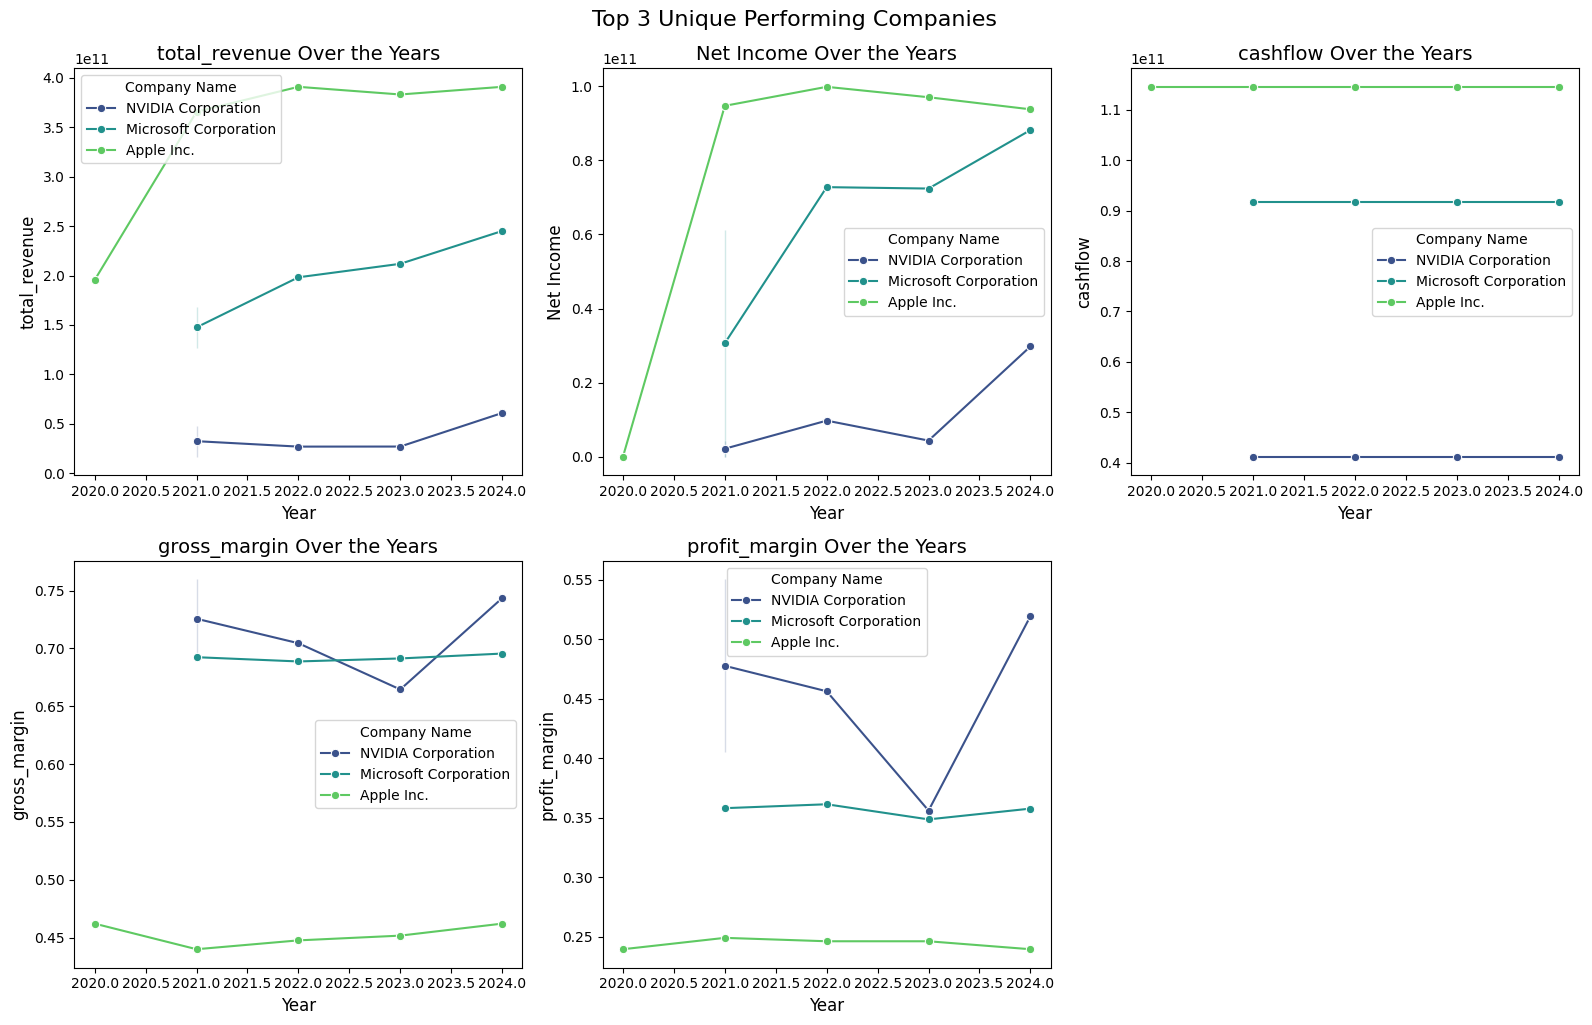

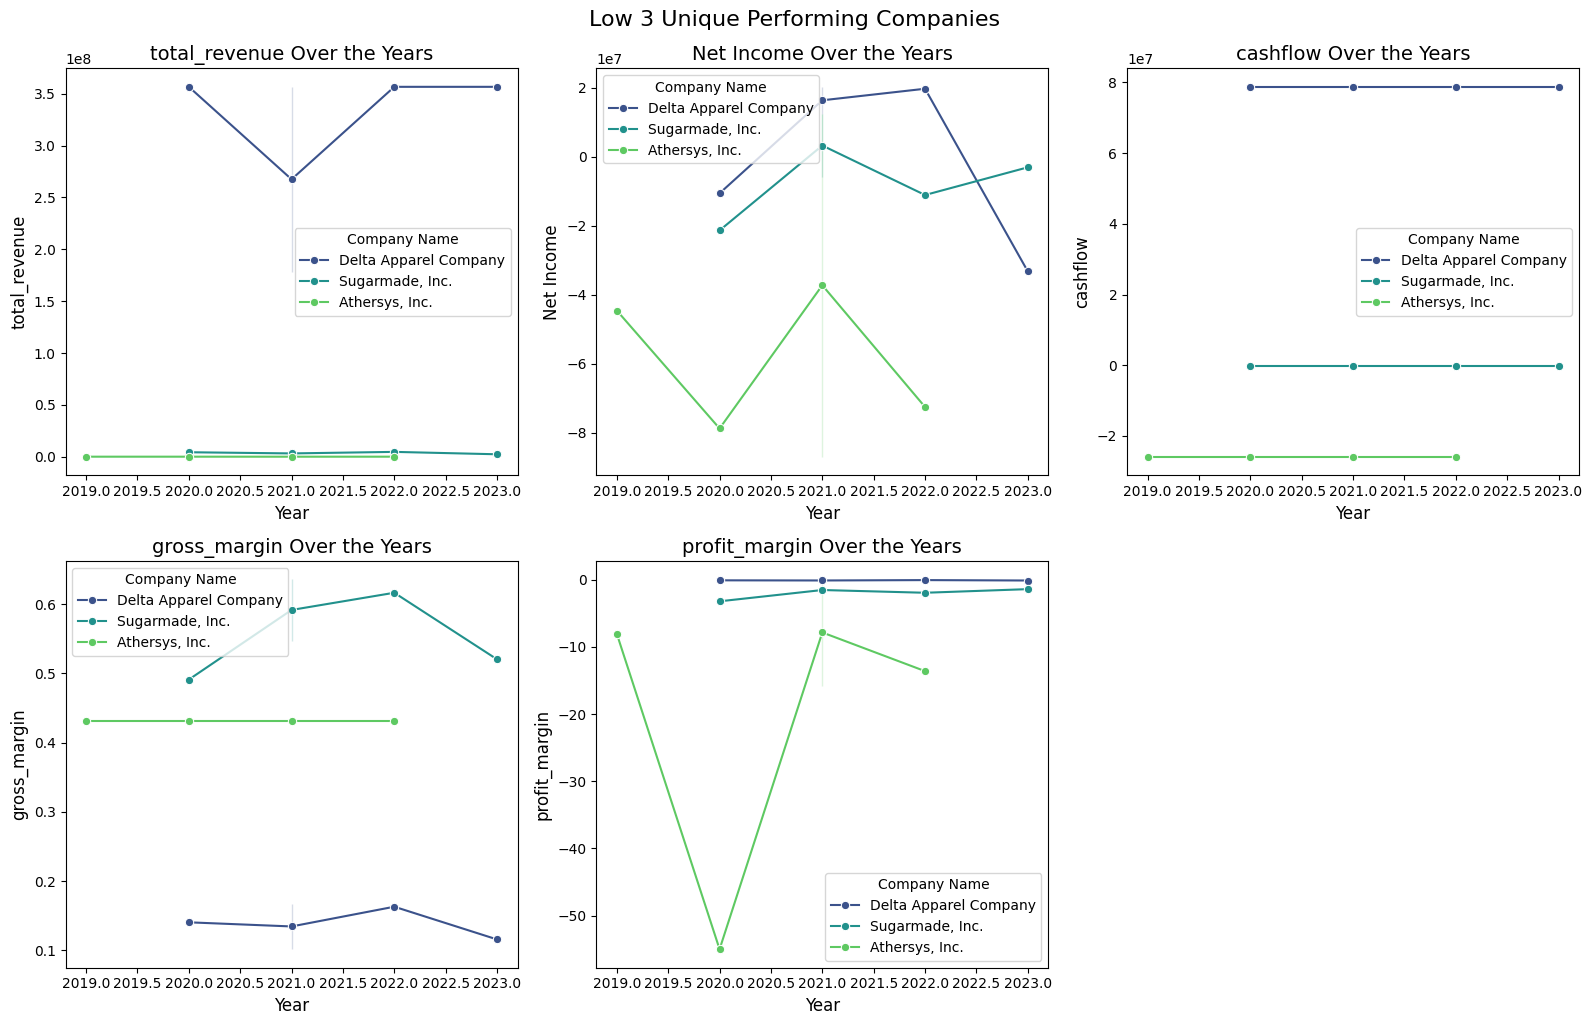

In [ ]:

def get_unique_performers(df_filtered, top=True, n=3):
    if top:
        sorted_data = df_filtered.nlargest(50, 'market_cap') 
    else:
        sorted_data = df_filtered.nsmallest(50, 'market_cap')  
    
    unique_companies = []
    for company in sorted_data['shortName'].unique():
        if company not in unique_companies:
            unique_companies.append(company)
        if len(unique_companies) == n:
            break

    return df_filtered[df_filtered['shortName'].isin(unique_companies)]


top_3_performers = get_unique_performers(df_filtered, top=True, n=3)
low_3_performers = get_unique_performers(df_filtered, top=False, n=3)

columns_to_plot = ['total_revenue', 'Net Income', 'cashflow', 'gross_margin', 'profit_margin']


def plot_line_graph(data, title):
    plt.figure(figsize=(16, 10))
    
    
    for idx, column in enumerate(columns_to_plot, 1):
        plt.subplot(2, 3, idx) 
        sns.lineplot(x='Year', y=column, hue='shortName', data=data, marker='o', palette='viridis')
        plt.title(f'{column} Over the Years', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.legend(title='Company Name', fontsize=10)

    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

plot_line_graph(top_3_performers, 'Top 3 Unique Performing Companies')
plot_line_graph(low_3_performers, 'Low 3 Unique Performing Companies')


In [8]:
colss=[
    'address1', 'city', 'state', 'country', 'industry', 'sector', 
    'recommendationKey', 'fullTimeEmployees', 'overallRisk', 'payoutRatio', 
    'volume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 
    'fiftyDayAverage', 'currency', 'enterpriseValue', 'totalCashPerShare', 
    'revenueGrowth', 'operatingMargins', 'Year', 'EBITDA', 'EBIT', 'Total Expenses', 
    'Profit', 'Total Profit', 'Cash Flow', 'Employees', 'ebitda', 'ebitdaMargins', 
    'totalAssets', 'threeYearAverageReturn', 'fiveYearAverageReturn', 'dividend_yield'
]
targets = [
    'market_cap', 'total_revenue', 'cashflow', 'profit_margin', 
    'gross_margin', 
    'total_debt', 'earningsGrowth', 
    'Gross Profit', 'Net Income', 'gross_margin', 'profit_margin', 'cashflow', 'total_debt', 'totalCash', 
    
]


In [10]:
X = df_filtered[colss[1:]]
y = df_filtered[targets]
company_names = df_filtered['shortName']
X_train, X_test, y_train, y_test, company_train, company_test = train_test_split( X, y, company_names, test_size=0.2, random_state=42)


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# svm_model = SVR()
# svm_model.fit(X_train, y_train)

joblib.dump(rf_model, 'rf_model_all_targets.pkl')
# joblib.dump(svm_model, 'svm_model_all_targets.pkl')

['rf_model_all_targets.pkl']

In [ ]:
rf_predictions = rf_model.predict(X_test)
# svm_predictions = svm_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
# svm_mse = mean_squared_error(y_test, svm_predictions)

next_year_data = X_test.tail(1)  
rf_next_year_prediction = rf_model.predict(next_year_data)
# svm_next_year_prediction = svm_model.predict(next_year_data)


print(rf_predictions)


[[ 8.38632740e+09  2.75990403e+09  4.57075542e+08 ...  4.57075542e+08
   4.93205223e+09  1.47990810e+08]
 [ 1.02481770e+09  1.37285218e+09  1.86294397e+08 ...  1.86294397e+08
   3.83020697e+08  1.79762962e+08]
 [ 2.39195125e+09  2.66341765e+09  3.55949807e+08 ...  3.55949807e+08
   3.49758139e+09  3.59176842e+08]
 ...
 [ 7.06055800e+05  4.18601235e+05 -2.08560015e+05 ... -2.08560015e+05
   2.56947000e+03  2.97838980e+05]
 [ 1.40515262e+08  2.50425709e+07  9.22668225e+05 ...  9.22668225e+05
  -1.91038545e+05  7.16913013e+06]
 [ 1.10783659e+08  1.77428595e+07 -9.72087365e+06 ... -9.72087365e+06
   1.89591690e+08  1.25856012e+07]] 4.6198289868865145e+22 [[ 1.10783659e+08  1.77428595e+07 -9.72087365e+06  4.82142417e-01
   8.15485200e-01  1.89591690e+08 -4.19960000e-01  2.18793754e+08
  -5.18215750e+05  8.15485200e-01  4.82142417e-01 -9.72087365e+06
   1.89591690e+08  1.25856012e+07]]


In [ ]:
rf_model.predict(X_test)